# Tugas Besar Machine Learning - Clustering 
## Nama: Gian Maxmillian Firdaus
## NIM:   1301190209

### Formulasi Masalah

Diberikan file dataset: kendaraan berisi beberapa kolom mengenai data pelanggan dari suatu dealer. 
Data akan digunakan untuk pembuatan model yang akan menemukan cluster dari suatu data yang dipilih. 

### Library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

### Membaca data source

Data source yang dibaca diambil dari file: kendaraan_train.csv

In [2]:
df_train = pd.read_csv(".\datasets\kendaraan_train.csv")

### Melihat dataset
Untuk melihat preview dari data source

In [45]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.037402,0.932099,0.557093,0.0
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.052380,0.981481,0.072664,0.0


### Menghitung jumlah baris dan kolom dari dataset

In [46]:
df_train.shape

(171068, 11)

### Menampilkan info dari dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


### Menampilkan Statistik Dataset

In [6]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Menghitung jumlah nilai kosong pada setiap kolom dari dataset

In [7]:
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Hanya kolom {id} dan {Tertarik} tidak memiliki nilai kosong.

### Membersihkan dataset
Semua kolom dari dataset yang bernilai null atau kosong akan di buang.
Tujuannya supaya dataset yang akan diolah sudah dalam keadaan bersih.

In [8]:
df_train.dropna(inplace = True, axis = 0)
df_train.shape

(171068, 12)

Sebelum dibersihkan jumlah baris = 285831,
Setelah dibersihkan jumlah baris = 171068

### Membuat index baru
Karena kolom {id} penomorannya sudah tidak teratur akibat pembersihan data, maka kolom {id} di drop
dan selanjutnya membuat index yang baru.

In [9]:
df_train = df_train.drop(["id"], axis = 1)
df_train = df_train.reset_index(drop=True)

In [10]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


Kolom {id} sudah di drop dan dataset sudah memiliki indeks yang baru

### Mengkonversi kolom dengan tipe data objek menjadi numerikal
Tujuan: agar pengolahan data mudah dilakukan

In [11]:
#Jenis Kelamin
df_train["Jenis_Kelamin"] = df_train["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])

#Umur Kendaraan
df_train["Umur_Kendaraan"] = df_train["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,3,2])

#Kendaraan Rusak
df_train["Kendaraan_Rusak"] = df_train["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0,0
2,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0,0
3,1,21.0,1.0,35.0,1.0,1,0,22735.0,152.0,171.0,0
4,0,20.0,1.0,8.0,1.0,1,0,30786.0,160.0,31.0,0


### Keterangan:
##### Jenis_Kelamin: 0 - Wanita, 1 - Pria
##### Umur_Kendaraan: 1 : "< 1 Tahun", 2 : "1-2 Tahun", 3 : "> 2 Tahun"
##### Kendaraan_Rusak: 0 : "Tidak, 1 : "Pernah"

### Export Dataset

In [12]:
df_train.to_csv('.\datasets\kendaraan_train_new.csv')

### Men - scalling dataset
Tujuan: supaya seluruh kolom dalam dataset berada dalam jangkauan yang sama.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.037402,0.932099,0.557093,0.0
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.052380,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
171063,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
171064,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
171065,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
171066,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


### Membuat Korelasi antar Kolom / Variabel
Tujuan: memperoleh hubungan antar variabel dengan variabel lainnya, supaya dapat menentukan kolom yang akan dibuat
clustering.

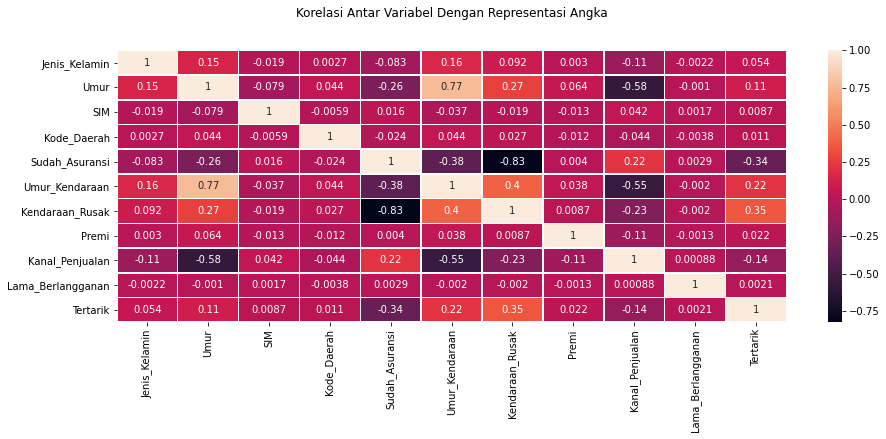

In [14]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_train.corr(), annot = True,linewidths=.5)
plt.title("Korelasi Antar Variabel Dengan Representasi Angka",y=1.1)
plt.show()

### Tahap: Splitting Dataset
###### Tujuan: Menentukan data mana yang akan dijadikan feature dan target.
###### feature : diambil dari kolom Umur
###### target : diambil dari kolom Kanal_Penjualan

In [15]:
x = df_train.iloc[:, [1,8]].values
x

array([[0.15384615, 0.93209877],
       [0.43076923, 0.17283951],
       [0.58461538, 0.75925926],
       ...,
       [0.04615385, 0.93209877],
       [0.73846154, 0.75925926],
       [0.38461538, 0.15432099]])

x adalah variabel array 2 Dimensi

### Menampilkan Visualisasi Data Sebaran Umur dan Kanal_Penjualan

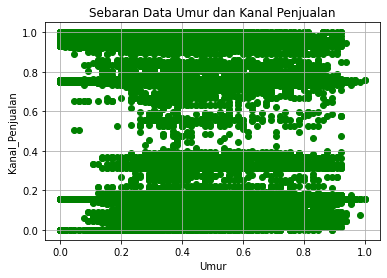

In [16]:
plt.scatter(x[:,0],x[:,1], color='green')
plt.title("Sebaran Data Umur dan Kanal Penjualan")
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.grid(True)

### Tahap: Pemodelan

##### Menghitung jarak dengan menggunakan Euclidean Distance

In [17]:
def euclidean_distance(x1,x2):
    return (sum((x1 - x2)**2)**0.5)

##### Membuat fungsi untuk mengelompokkan data kedalam cluster
Mengembalikan list yang berisi cluster dari setiap dataset

In [18]:
def clustering(centroids, x):
    clusters = []
    for i in range(len(x)):
        jarak = []
        for centroid in centroids:
            jarak.append(euclidean_distance(centroid, x[i]))
        jarak_min = [z for z, val in enumerate(jarak) if val==min(jarak)]
        clusters.append(jarak_min[0])
    return np.array(clusters)

###### Keterangan:
###### 1. --baris 2, membuat array cluster dari tiap observasi
###### 2. --baris 4, inisialisasi jarak
###### 3. --baris 6, membuat array jarak untuk menampung jarak antara setiap baris data obervasi dengan setiap centroid.
###### 4. --baris 7, membuat variabel jarak_min yang menyimpan indeks dari nilai terkecil variabel jarak.
###### 5. --baris 8, indeks dari jarak terpendek adalah cluster dari data observasi. 
###### 6. --baris 9, indeks ini akan disimpan dalam array cluster

##### Membuat fungsi untuk membuat centroid baru

In [19]:
def create_centroid(clusters, x):
    new_centroid = []
    df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_x['cluster']):
        df_current_cluster = df_clusters_x[df_clusters_x['cluster']==c][df_clusters_x.columns[:-1]]
        average_cluster = df_current_cluster.mean(axis=0)
        new_centroid.append(average_cluster)
    return np.array(new_centroid)

##### Keterangan:
##### 1. -- baris 2,  inisialisasi new_centroid
##### 2. -- baris 3, untuk mendapatkan new_centroid, mula-mula dibuat dataframe yang berisi 2 kolom feature dari: data observasi dan 1 kolom yang berisi cluster dari data tersebut.
##### 3. -- baris 4, Looping sebanyak jumlah cluster pada kolom cluster dataframe.
##### 4. -- baris 5-6, Di dalam looping dilakukan proses perhitungan rata-rata cluster dengan menghitung rata-rata dataframe yang berisi data observasi ke[i]
##### 5. -- baris 7, rata-rata cluster akan di simpan ke dalam variabel new_centroid. Variabel ini akan berisi array 2 dimensi yang berisi rata-rata dari data observasi.


### Menghitung varian
##### Dasar penghitungan varian adalah untuk mengetahui keragaman suatu kelompok data.

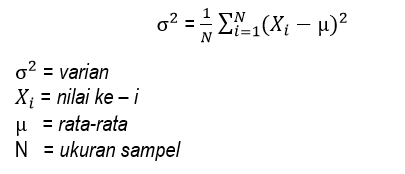

In [20]:
def varians_cluster(clusters, x):
    varians = []
    df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_x['cluster']):
        df_current_cluster = df_clusters_x[df_clusters_x['cluster'] ==c][df_clusters_x.columns[:-1]]
        average_cluster = df_current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(average_cluster, df_current_cluster.shape[0],1)
        varians.append(np.sum(np.sum((df_current_cluster - mean_repmat)**2)))
    return np.array(varians)

##### Keterangan:
##### -- baris 2, inisialisasi variabel varian
##### -- baris 3, menampung data observasi dan cluster pada sebuah variabel variabel dataframe
##### -- baris 4, looping sebanyak cluster pada kolom cluster dataframe
##### -- baris 5, mengambil nilai data observasi ke i
##### -- baris 6, menghitung rata-rata cluster
##### -- baris 7, membuat duplikat array dengan menggunakan fungsi repmat
##### -- baris 8, diperoleh data varian dengan cara menghitung seluruh data observasi dan mengurangkannya dengan rata-rata cluster.

##### WCSS ( Within-Cluster Sum of Square ) = SSE (Sum of Square Error)
Metode Elbow adalah untuk menghasilkan informasi dengan cara melihat perbandingan hasil antara jumlah cluster yang akan
membentuk suatu titik terakhir. Cluster nilai akan digunakan sebagai model data untuk cluster terbaik.
Selain itu, hasil perhitungan akan digunakan untuk membandingkan jumlah cluster.

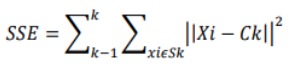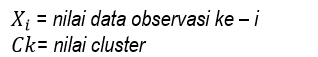

In [21]:
def elbow_method(SSE, k):
    plt.plot(range(1,k+1),SSE)
    plt.title('The Elbow Method')
    plt.xlabel("Jumlah Cluster")
    plt.ylabel("SSE")
    plt.show()

##### K-Means Clustering
Metode K-Means Clustering berusaha mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain.

Varian cluster awal 2255 pada K: 1
Varian pada percobaan clustering Ke- 1 1764
Varian pada percobaan clustering Ke- 2 1087
SSE Cluster dengan K = 1 : 2851 

Varian cluster awal 1087 pada K: 2
Varian pada percobaan clustering Ke- 1 558
Varian pada percobaan clustering Ke- 2 507
SSE Cluster dengan K = 2 : 1065 

Varian cluster awal 507 pada K: 3
Varian pada percobaan clustering Ke- 1 484
Varian pada percobaan clustering Ke- 2 460
SSE Cluster dengan K = 3 : 944 

Varian cluster awal 460 pada K: 4
Varian pada percobaan clustering Ke- 1 439
Varian pada percobaan clustering Ke- 2 415
SSE Cluster dengan K = 4 : 854 

Varian cluster awal 415 pada K: 5
Varian pada percobaan clustering Ke- 1 396
Varian pada percobaan clustering Ke- 2 381
SSE Cluster dengan K = 5 : 778 



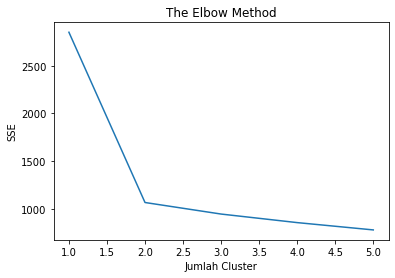

In [22]:
k = 5
SSE = []
centroid_awal = np.random.choice(len(x), k, replace=False)
centroids = x[centroid_awal, :]
#Looping K
for i in range (1,k+1):
    variansCluster = []
    clusters = clustering(centroids, x)
    print("Varian cluster awal", round(np.mean(varians_cluster(clusters, x))), "pada K:",i )
    
    #Looping Percobaan Clustering
    for j in range(2):
        centroids = create_centroid(clusters,x)
        clusters = clustering(centroids, x)
        cluster_var = np.mean(varians_cluster(clusters, x))
        variansCluster.append(cluster_var)
        print("Varian pada percobaan clustering Ke-",j+1, round(cluster_var))
    SSE.append(np.sum(variansCluster))
    print("SSE Cluster dengan K =",i,":",round(SSE[i-1]),"\n")

elbow_method(SSE,k)

##### Tahap Visualisasi

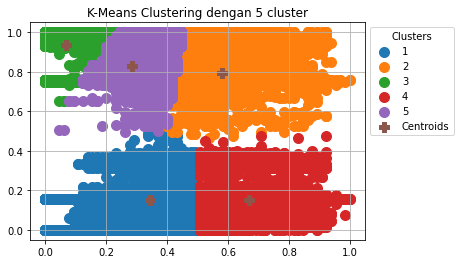

In [23]:
df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
label = df_clusters_x['cluster']
u_labels = np.unique(label)
for i in range(len(u_labels)):
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i+1, s = 100)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'P', s = 100, label = 'Centroids')
plt.title('K-Means Clustering dengan {} cluster'.format(k))
plt.legend(bbox_to_anchor=(1, 1), title = 'Clusters')
plt.grid(True)
plt.show()

##### Pengujian dengan Silhouette Method
Pengujian model ini dilakukan untuk mengetahui seberapa dekat relasi antara objek dalam sebuah cluster dan seberapa jauh sebuah cluster terpisah dengan cluster lain. Hasil perhitungan nilai silhoutte coeffisien dapat bervariasi antara -1 hingga 1. Jika bernilai positif atau mendekati angka 1 maka di asumsikan bahwa data/objek sudah berada dalam cluster yang tepat.

In [24]:
%%time
from sklearn.metrics import silhouette_score

skor_silhouette = []

for n_cluster in range(k):
    koefisien_silhouette = silhouette_score(df_clusters_x, df_clusters_x['cluster'], metric = 'euclidean')
    skor_silhouette.append(koefisien_silhouette)
    print('Nilai Silhoutte Method untuk, n_clusters = {} adalah {}'.format(n_cluster+1, koefisien_silhouette))

Nilai Silhoutte Method untuk, n_clusters = 1 adalah 0.9042165693158712
Nilai Silhoutte Method untuk, n_clusters = 2 adalah 0.9042165693158712
Nilai Silhoutte Method untuk, n_clusters = 3 adalah 0.9042165693158712
Nilai Silhoutte Method untuk, n_clusters = 4 adalah 0.9042165693158712
Nilai Silhoutte Method untuk, n_clusters = 5 adalah 0.9042165693158712
Wall time: 19min 48s


## Tahap Eksperimen
1. Menggunakan dataset train ("kendaraan_train.csv")
2. Scalling dengan menggunakan StandardScaler
3. Menggunakan Principal Component Analysis (PCA) dalam pemilihan feature
4. Jumlah cluster k = 5

##### Import Dataset

In [25]:
df_train_eks = pd.read_csv(".\datasets\kendaraan_train.csv")

##### Menampilkan Preview Dataset

In [26]:
df_train_eks.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


##### Menampilkan jumlah baris dan kolom dataset

In [27]:
df_train_eks.shape

(285831, 12)

##### Menampilkan struktur file

In [28]:
df_train_eks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


##### Menampilkan statistik dataset

In [29]:
df_train_eks.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##### Membersihkan dataset
Semua kolom dari dataset yang bernilai null atau kosong akan di buang. Tujuannya supaya dataset yang akan diolah sudah dalam keadaan bersih.

In [30]:
df_train_eks.dropna(inplace = True, axis = 0)
df_train_eks.shape

(171068, 12)

Sebelum dibersihkan jumlah baris = 285831, Setelah dibersihkan jumlah baris = 171068

##### Membuat index baru
Karena kolom {id} penomorannya sudah tidak teratur akibat pembersihan data, maka kolom {id} di drop untuk membuat index yang baru, dan selanjutnya menampilkan kembali preview dataset.

In [31]:
df_train_eks = df_train_eks.drop(["id"], axis = 1)
df_train_eks = df_train_eks.reset_index(drop=True)
df_train_eks.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
3,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
4,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


##### Mengkonversi kolom dengan tipe data objek menjadi numerikal
Tujuan: agar pengolahan data mudah dilakukan

In [32]:
#Jenis Kelamin
df_train_eks["Jenis_Kelamin"] = df_train_eks["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])

#Umur Kendaraan
df_train_eks["Umur_Kendaraan"] = df_train_eks["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,3,2])

#Kendaraan Rusak
df_train_eks["Kendaraan_Rusak"] = df_train_eks["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])

df_train_eks.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,30.0,1.0,33.0,1.0,1,0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,3,1,25800.0,29.0,158.0,0
2,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0,0
3,1,21.0,1.0,35.0,1.0,1,0,22735.0,152.0,171.0,0
4,0,20.0,1.0,8.0,1.0,1,0,30786.0,160.0,31.0,0


### Keterangan:
##### Jenis_Kelamin: 0 - Wanita, 1 - Pria
##### Umur_Kendaraan: 1 : "< 1 Tahun", 1.5 : "1-2 Tahun", 2 : "> 2 Tahun"
##### Kendaraan_Rusak: 0 : "Tidak, 1 : "Pernah"

### Scalling Dataset

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_eks = pd.DataFrame(scaler.fit_transform(df_train_eks), columns=df_train_eks.columns)
df_train_eks

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,-1.084918,-0.567753,0.045537,0.496795,1.083923,-1.071127,-1.008925,-0.144979,0.734473,-0.682703,-0.372027
1,0.921729,0.591171,0.045537,0.949204,-0.922575,2.452328,0.991154,-0.275404,-1.538819,0.044680,-0.372027
2,-1.084918,1.235018,0.045537,1.627818,-0.922575,0.690601,-1.008925,-1.631139,0.216975,-1.088129,-0.372027
3,0.921729,-1.147215,0.045537,0.647598,1.083923,-1.071127,-1.008925,-0.454745,0.734473,0.199696,-0.372027
4,-1.084918,-1.211599,0.045537,-1.388242,1.083923,-1.071127,-1.008925,0.016340,0.882329,-1.469707,-0.372027
...,...,...,...,...,...,...,...,...,...,...,...
171063,-1.084918,-1.018445,0.045537,-1.689848,1.083923,-1.071127,-1.008925,-0.264403,0.734473,0.748214,-0.372027
171064,-1.084918,-1.147215,0.045537,1.477015,1.083923,-1.071127,-1.008925,0.829664,0.734473,-1.243145,-0.372027
171065,-1.084918,-1.018445,0.045537,1.778621,1.083923,-1.071127,-1.008925,1.126030,0.734473,0.855532,-0.372027
171066,0.921729,1.878864,0.045537,-1.463643,1.083923,0.690601,-1.008925,-0.000219,0.216975,1.380202,-0.372027


### Membuat Korelasi antar Kolom / Variabel
Tujuan: melihat hubungan antar variabel dengan variabel lainnya, supaya dapat menentukan kolom yang akan dibuat
clustering.

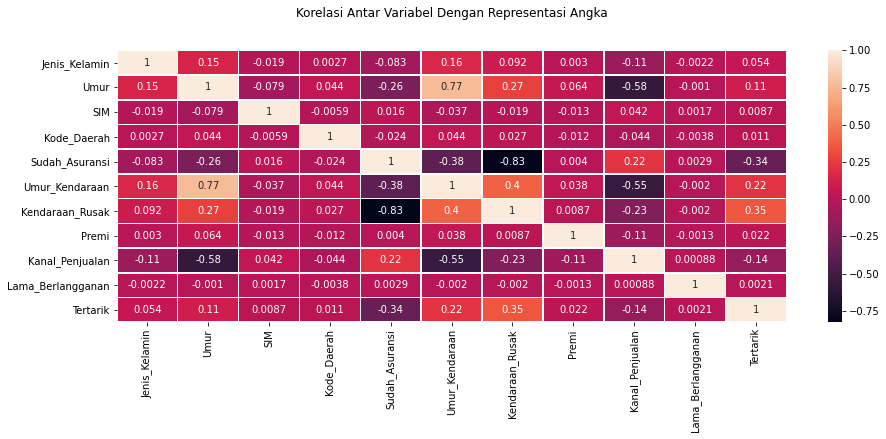

In [34]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_train_eks.corr(), annot = True,linewidths=.5)
plt.title("Korelasi Antar Variabel Dengan Representasi Angka",y=1.1)
plt.show()

### Tahap: Splitting Dataset
Konsep Principal Component Analysis (PCA) adalah mengelompokkan variabel-variabel yang berkorelasi linear menjadi 1 komponen utama, sehingga dari p variabel random (x1, x2, x3…, xp) akan didapat k komponen utama (k < p) yang
mewakili variabilitas variabel yang ada. Tujuan dilakukannya PCA adalah untuk mereduksi struktur variabel menjadi variabel baru dengan dimensi yang lebih kecil. Variabel baru tersebut mampu menerangkan sebagian besar total varian data
dan saling bebas satu sama lain.

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(df_train_eks)
x

array([[-2.14252134,  0.17797044],
       [ 2.86947419,  0.81972798],
       [ 0.48353213,  0.45024887],
       ...,
       [-2.22670416,  0.25220758],
       [ 0.15134263,  2.01599362],
       [ 1.96471414,  0.36453143]])

##### Visualisasi setelah melalui proses PCA

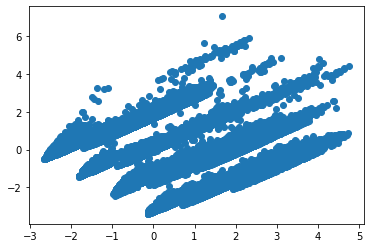

In [36]:
plt.scatter(x[:,0],x[:,1])

### Tahap: Pemodelan

##### Menghitung jarak dengan menggunakan Euclidean Distance

In [37]:
def euclidean_distance(x1,x2):
    return (sum((x1 - x2)**2)**0.5)

##### Membuat fungsi untuk mengelompokkan data kedalam cluster
Mengembalikan list yang berisi cluster dari setiap dataset

In [38]:
def clustering(centroids, x):
    clusters = []
    for i in range(len(x)):
        jarak = []
        for centroid in centroids:
            jarak.append(euclidean_distance(centroid, x[i]))
        jarak_min = [z for z, val in enumerate(jarak) if val==min(jarak)]
        clusters.append(jarak_min[0])
    return np.array(clusters)

##### Membuat fungsi untuk membuat centroid baru

In [39]:
def create_centroid(clusters, x):
    new_centroid = []
    df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_x['cluster']):
        df_current_cluster = df_clusters_x[df_clusters_x['cluster']==c][df_clusters_x.columns[:-1]]
        average_cluster = df_current_cluster.mean(axis=0)
        new_centroid.append(average_cluster)
    return np.array(new_centroid)

### Menghitung varian
##### Dasar penghitungan varian adalah untuk mengetahui keragaman suatu kelompok data.

In [40]:
def varians_cluster(clusters, x):
    varians = []
    df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_x['cluster']):
        df_current_cluster = df_clusters_x[df_clusters_x['cluster'] ==c][df_clusters_x.columns[:-1]]
        average_cluster = df_current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(average_cluster, df_current_cluster.shape[0],1)
        varians.append(np.sum(np.sum((df_current_cluster - mean_repmat)**2)))
    return np.array(varians)

In [41]:
def elbow_method(SSE, k):
    plt.plot(range(1,k+1),SSE)
    plt.title('The Elbow Method')
    plt.xlabel("Jumlah Cluster")
    plt.ylabel("SSE")
    plt.show()

##### K-Means Clustering

Varian cluster awal 39188 pada K: 1
Varian pada percobaan clustering Ke- 1 26245
Varian pada percobaan clustering Ke- 2 25391
SSE Cluster dengan K = 1 : 51635 

Varian cluster awal 25391 pada K: 2
Varian pada percobaan clustering Ke- 1 25108
Varian pada percobaan clustering Ke- 2 24931
SSE Cluster dengan K = 2 : 50039 

Varian cluster awal 24931 pada K: 3
Varian pada percobaan clustering Ke- 1 24770
Varian pada percobaan clustering Ke- 2 24497
SSE Cluster dengan K = 3 : 49267 

Varian cluster awal 24497 pada K: 4
Varian pada percobaan clustering Ke- 1 23888
Varian pada percobaan clustering Ke- 2 22960
SSE Cluster dengan K = 4 : 46848 

Varian cluster awal 22960 pada K: 5
Varian pada percobaan clustering Ke- 1 22501
Varian pada percobaan clustering Ke- 2 22376
SSE Cluster dengan K = 5 : 44877 



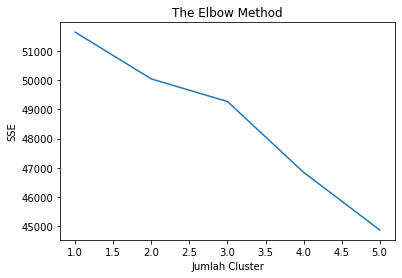

In [42]:
k = 5
SSE = []
centroid_awal = np.random.choice(len(x), k, replace=False)
centroids = x[centroid_awal, :]
#Looping K
for i in range (1,k+1):
    variansCluster = []
    clusters = clustering(centroids, x)
    print("Varian cluster awal", round(np.mean(varians_cluster(clusters, x))), "pada K:",i )
    
    #Looping Percobaan Clustering
    for j in range(2):
        centroids = create_centroid(clusters,x)
        clusters = clustering(centroids, x)
        cluster_var = np.mean(varians_cluster(clusters, x))
        variansCluster.append(cluster_var)
        print("Varian pada percobaan clustering Ke-",j+1, round(cluster_var))
    SSE.append(np.sum(variansCluster))
    print("SSE Cluster dengan K =",i,":",round(SSE[i-1]),"\n")

elbow_method(SSE,k)

##### Tahap Visualisasi

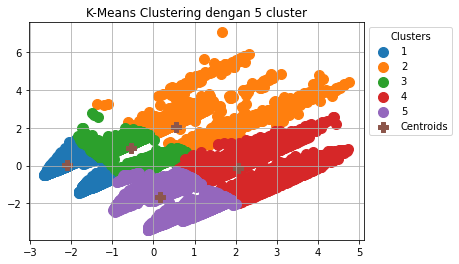

In [43]:
df_clusters_x = pd.concat([pd.DataFrame(x),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
label = df_clusters_x['cluster']
u_labels = np.unique(label)
for i in range(len(u_labels)):
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i+1, s = 100)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'P', s = 100, label = 'Centroids')
plt.title('K-Means Clustering dengan {} cluster'.format(k))
plt.legend(bbox_to_anchor=(1, 1), title = 'Clusters')
plt.grid(True)
plt.show()

##### Pengujian dengan Silhouette Method

In [44]:
%%time
from sklearn.metrics import silhouette_score

skor_silhouette = []

for n_cluster in range(k):
    koefisien_silhouette = silhouette_score(df_clusters_x, df_clusters_x['cluster'], metric = 'euclidean')
    skor_silhouette.append(koefisien_silhouette)
    print('Nilai Silhoutte Method untuk, n_clusters = {} adalah {}'.format(n_cluster+1, koefisien_silhouette))

Nilai Silhoutte Method untuk, n_clusters = 1 adalah 0.6310198307312876
Nilai Silhoutte Method untuk, n_clusters = 2 adalah 0.6310198307312876
Nilai Silhoutte Method untuk, n_clusters = 3 adalah 0.6310198307312876
Nilai Silhoutte Method untuk, n_clusters = 4 adalah 0.6310198307312876
Nilai Silhoutte Method untuk, n_clusters = 5 adalah 0.6310198307312876
Wall time: 19min 22s


### Kesimpulan

1. Hasil yang diperoleh bergantung pada proses pengolahan dataset awal. Semakin baik kualitas data tentu semakin baik hasil yang akan diperoleh. Data yang tidak lengkap sebaiknya dikeluarkan supaya tidak mempengaruhi gambaran data yang sebenarnya.
2. Metode dalam penentuan feature, baik dipilih berdasarkan visualisasi korelasi antar variabel (dipilih) maupun dengan `PCA` keduanya menghasilkan hasil yang berbeda walaupun mempunyai gambaran umum yang sama.
3. Pemilihan scalling baik secara `StandardScaler` ataupun `MinMaxScaler` juga turut mempengaruhi hasil akhir. 
4. Pengujian hasil `k-means` dapat dilakukan dengan `Elbow Method` dan `Silhouette Method`.
5. Berdasarkan hasil pengujian Silhouette Method, hasil yang lebih akurat diperoleh berdasarkan kombinasi dari MinMaxScalar, penentuan variabel yang dipilih berdasarkan korelasi antar variabel, k-means dan Elbow Method.